<a href="https://colab.research.google.com/github/BALaka-18/Decision-Trees-Series/blob/master/Copy_of_Regression_trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd

In [0]:
df=pd.DataFrame()

In [0]:
df['hrs']=np.array([1,2.5,1.5,2.1,5,4,6.5,3.5,8,7.5])
df['marks']=np.array([37,50,43,60,27,80,30,75,64,56])

In [4]:
df

,hrs,marks
0,1.0,37
1,2.5,50
2,1.5,43
3,2.1,60
4,5.0,27
5,4.0,80
6,6.5,30
7,3.5,75
8,8.0,64
9,7.5,56


In [0]:
import matplotlib.pyplot as plt

[]

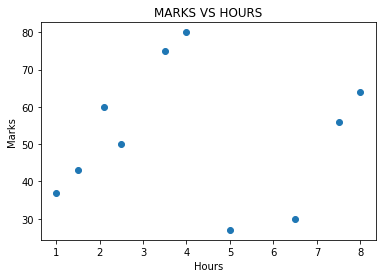

In [6]:
plt.scatter(df['hrs'],df['marks'])
plt.xlabel("Hours")
plt.ylabel("Marks")
plt.title("MARKS VS HOURS")
plt.plot()

In [0]:
# You have to find the first splitting criteria.

#### TASK : We have to find the first splitting condition on the hrs column.

In [8]:
l = list(df.hrs.values)[0:2]
m = np.mean(l)
'''less = [elem for elem in l if elem < m]
less'''
m

1.75

In [0]:
def best_split_hrs(df):
  hours = list(df.hrs.values)
  # Initialize sse (squared sum error) list and mean_list
  sse_list,mean_list = [],[]
  for i in range(df.shape[0]):
    # Take a combination of 2 consecutive points at a time
    new = hours[i:i+2]

    # Find their mean
    mean_div = np.mean(new)
    mean_list.append(mean_div)

    # Split on the basis of the mean
    less = [elem for elem in hours if elem < mean_div]
    more = [elem2 for elem2 in hours if elem2 >= mean_div]

    '''Find means for each of the two sub-groups
       splitting_criteria = mean_div
                        
                        ----------------------------- 
                       | is hrs < splitting_criteria |
                        -----------------------------
                              /              \
                             /                \
                            /                  \
                          True                 False   
                        mean_less            mean_more
    '''
    
    mean_less = np.mean(less)
    mean_more = np.mean(more)

    # Find sse.
    sse_less = [(mean_less - pt)**2 for pt in less]
    sse_more = [(mean_more - pt2)**2 for pt2 in more]
    sse = sum(sse_less) + sum(sse_more)

    # Store in the list for comparison
    sse_list.append(sse)
  # Get the data point corresponding to the least sse.
  split = int(hours[sse_list.index(min(sse_list))])
  return split,sse_list,mean_list

Splitting condition : hrs <  5 




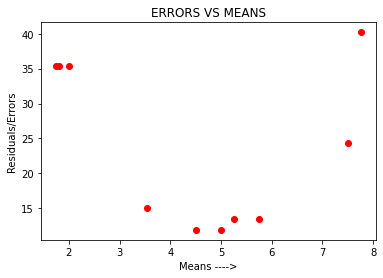

In [10]:
condition,lst,m = best_split_hrs(df)

# Print
print("Splitting condition : hrs < ",condition,"\n\n")
# Plot the residuals
plt.scatter(x=m,y=lst,c='red')
plt.xlabel("Means ---->")
plt.ylabel("Residuals/Errors")
plt.title("ERRORS VS MEANS")
plt.show()

In [0]:
# Specify a threshold for leaf nodes
# If threshold is satisified, move to the next branch
# Else, follow the same steps for that branch.